In [1]:
import pkg_resources
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from psifr import fr
import psifr.transitions as tr
import importlib
data_file = pkg_resources.resource_filename('psifr', 'data/Morton2013.csv')

In [2]:
df = pd.read_csv(data_file, dtype={'category': 'category'})
df.category.cat.as_ordered(inplace=True)

study = df.query('trial_type == "study"').copy()
recall = df.query('trial_type == "recall"').copy()
data = fr.merge_lists(study, recall, 
                      list_keys=['list_type', 'list_category'], 
                      study_keys=['category'])

In [38]:
subj = data.query('subject == 3')
df_output = subj.query('recalled').sort_values(['list', 'output']).reset_index()

# recall pool
list_length = int(df_output['input'].max())
pool_items = list(range(1, list_length + 1))

# recall input positions
all_recalls = df_output['input'].to_numpy()
indices = df_output.groupby('list').indices
recall_items = [all_recalls[ind] for name, ind in indices.items()]

In [23]:
pure = data.loc[data['list_type'] == 'pure']
crp = fr.lag_crp(pure)

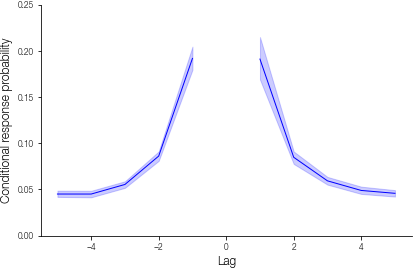

In [43]:
g = sns.lineplot(x='lag', y='prob', color='b',
                 data=crp.query('-5 <= lag < 0').reset_index())
g = sns.lineplot(x='lag', y='prob', color='b',
                 data=crp.query('5 >= lag > 0').reset_index())
g.set_xlabel('Lag');
g.set_ylabel('Conditional response probability');
g.set_ylim(0, .25);

In [44]:
pure_crp_cat = pure.groupby(['list_category']).apply(fr.lag_crp)
pure_crp_cat

prob  actual  possible
list_category subject lag                            
cel           1       -23  0.000000       0         6
                      -22  0.083333       1        12
                      -21  0.062500       1        16
                      -20  0.000000       0        16
                      -19  0.000000       0        18
...                             ...     ...       ...
obj           47       19  0.000000       0         4
                       20  0.000000       0         1
                       21  0.000000       0         1
                       22       NaN       0         0
                       23       NaN       0         0

[5640 rows x 3 columns]

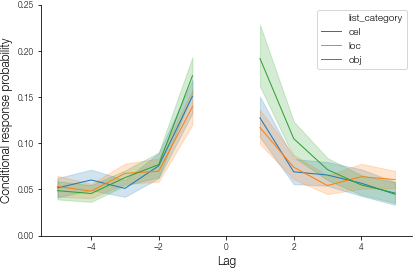

In [45]:
g = sns.lineplot(x='lag', y='prob', hue='list_category', 
                 data=pure_crp_cat.query('-5 <= lag < 0').reset_index())
g = sns.lineplot(x='lag', y='prob', hue='list_category', legend=False,
                 data=pure_crp_cat.query('5 >= lag > 0').reset_index())
g.set_xlabel('Lag');
g.set_ylabel('Conditional response probability');
g.set_ylim(0, .25);

In [25]:
pure_crp_cat = pure.groupby(['list_category']).apply(fr.lag_crp)

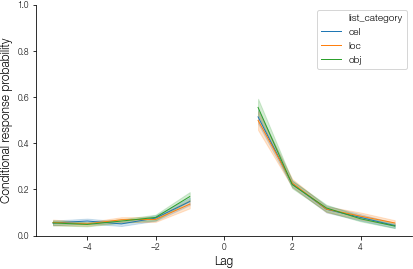

In [28]:
g = sns.lineplot(x='lag', y='prob', hue='list_category', 
                 data=pure_crp_cat.query('-5 <= lag < 0').reset_index())
g = sns.lineplot(x='lag', y='prob', hue='list_category', legend=False,
                 data=pure_crp_cat.query('5 >= lag > 0').reset_index())
g.set_xlabel('Lag');
g.set_ylabel('Conditional response probability');
g.set_ylim(0, 1);

In [6]:
prob = crp.unstack().loc[:, 'prob']
prob.loc[:, -5:5]

lag,-5,-4,-3,-2,-1,0,1,2,3,4,5
subject,,,,,,,,,,,
1,0.053763,0.032172,0.067669,0.088095,0.205543,NaN,0.554517,0.200326,0.099145,0.078292,0.029070
2,0.032544,0.043103,0.063014,0.091384,0.168421,NaN,0.558912,0.209571,0.114923,0.066071,0.057143
3,0.056180,0.048257,0.054404,0.076739,0.197044,NaN,0.576696,0.208668,0.126645,0.066202,0.037453
4,0.052109,0.057692,0.070258,0.083333,0.268018,NaN,0.555375,0.237168,0.118959,0.069860,0.034043
5,0.064732,0.034335,0.043388,0.095634,0.209544,NaN,0.457746,0.249531,0.129707,0.096070,0.044393
6,0.038961,0.043257,0.076923,0.072464,0.187192,NaN,0.568012,0.226974,0.119171,0.074074,0.034000
7,0.032520,0.063107,0.048544,0.101896,0.175772,NaN,0.479475,0.199643,0.128788,0.078029,0.068465
8,0.038462,0.035088,0.060606,0.068681,0.147945,NaN,0.666199,0.226528,0.080257,0.042088,0.030797
10,0.039683,0.031746,0.070270,0.056980,0.138728,NaN,0.634113,0.216814,0.108731,0.069395,0.037475


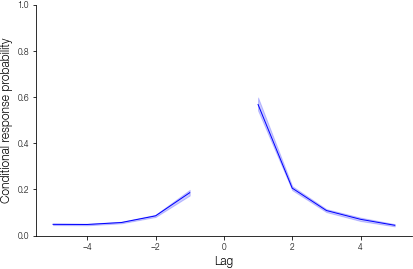

In [18]:
g = sns.lineplot(x='lag', y='prob', color='b',
                 data=crp.query('-5 <= lag < 0').reset_index())
g = sns.lineplot(x='lag', y='prob', color='b',
                 data=crp.query('5 >= lag > 0').reset_index())
g.set_xlabel('Lag');
g.set_ylabel('Conditional response probability');
g.set_ylim(0, 1);